<!DOCTYPE html>
<html>

<head>
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin-top: 20px;
        }

        th, td {
            border: 1px solid black;
            padding: 8px;
            text-align: left;
        }

        th {
            background-color: #f2f2f2;
        }
    </style>
</head>

<body>

    <table>
        <tr>
            <th>Name</th>
            <td>Your Name</td>
        </tr>
        <tr>
            <th>Roll Number</th>
            <td>XYZ123</td>
        </tr>
    </table>

</body>

</html>


Submitted by:-
| **Name**     | **Roll Number** |
|:-------------|:-----------------|
| Yug Patel    | CS23MTECH14019           |


# Assignment - 1

## 1) Perceptron learning algorithm

### Importing Required Modules

In [8]:
import torch
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

### Generating Linearly Seperable Data 

- The linearly seperable data is generated from guassian distribution corresponding to mentioned mean and with variance one in order to have a similar spread
- Also notice the usage of gamma, which is sensible to datapoint and indeed change sthe mean of the distribution thus increasing the level of separability 

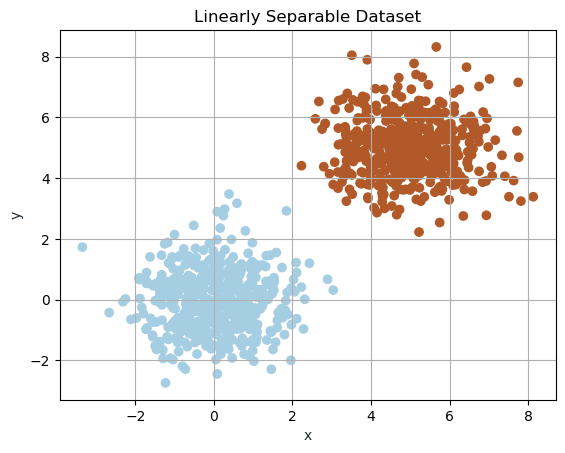

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def generate_linear_data(data_points,gamma):
    
    positive_class = np.random.normal(loc=5, scale=1, size=(data_points // 2, 2)) + gamma 
    negative_class = np.random.normal(loc=0, scale=1, size=(data_points // 2, 2)) - gamma
    
    # Adding a third dimesion for bias whose corresponding input is 1
    X = np.ones((1000, 3))
    X[::2, :2] = positive_class
    X[1::2, :2] = negative_class
    
    # Classifing the data by associating it with the appropriate labels
    y = np.empty((1000,1))
    y[::2,:] = 1.0
    y[1::2,:] = -1.0
    
    return X,y;

X,y = generate_linear_data(1000,0)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.Paired)
plt.title('Linearly Separable Dataset')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.grid()
plt.show()


### Perceptron Learning Algorithm

- The simple grade-school algorithm implemented from scratch

In [10]:
def perceptron_learning_algorithm(X, y, num_epochs=1000, num_runs=5):
    num_points, num_features = X.shape
    results = []

    for run in range(num_runs):
        # Initialize random weights for each run
        np.random.seed(run)
        initial_weight = np.random.rand(num_features)
        weights = initial_weight.copy()
        k = 0

        for epoch in range(num_epochs):
            nb_changes=0
            for i in range(num_points):
                if y[i] * np.dot(weights, X[i]) <= 0:
                    weights += y[i] * X[i]
                    nb_changes+=1
                    k += 1
            if nb_changes==0:
                break;
        results.append((initial_weight,weights, k))

    return results

### Analysis 

- I am gonna take 5 different values of weight vector for a given gamma, pass it throught the model to learn the parameter. Corresponding to every different weight vector the number of updates are going to be slightly different. 

- Also I am capturing the randomly inilitized values of w, and plotting the decision surface before and after the classification  corresponding to the first weight vectore of every gamma 

In [11]:
def plot_classifier(X, y, weights, title, ax):
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Plot the decision boundary
    x_decision_boundary = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_decision_boundary = (-weights[0] / weights[1]) * x_decision_boundary - (weights[2]/weights[1])
    ax.plot(x_decision_boundary, y_decision_boundary, color='red', linestyle='--')

In [12]:
def plot_subplots(X, y, results, gamma_values):
    num_subplots = len(results)
    fig, axes = plt.subplots(num_subplots, 2, figsize=(10, 4 * num_subplots))

    for i, (initial_weight,weights, k) in enumerate(results):
        title_before = f'Before (Gamma = {gamma_values[i]:.2f}, k = {k:3})'
        title_after = f'After  (Gamma = {gamma_values[i]:.2f}, k = {k:3})'
        # Before Calssification
        plot_classifier(X, y, initial_weight, title_before,  axes[i, 0] if num_subplots > 1 else axes[0])

        # Plot after classification with final weights
        plot_classifier(X, y, weights, title_after, axes[i, 1] if num_subplots > 1 else axes[1])
    
    plt.tight_layout() 
    plt.show()



Results for gamma = 0.0:

Run 1: Weights = [ 0.83037,  1.07326, -5.39724], k = 8

Run 2: Weights = [ 1.55398,  1.11246, -6.99989], k = 11

Run 3: Weights = [ 1.88023,  1.16844, -7.45034], k = 12

Run 4: Weights = [ 2.32667,  3.04475, -12.70910], k = 25

Run 5: Weights = [ 1.92159,  4.79919, -15.02732], k = 30

Average k for gamma = 0.0: 17.20


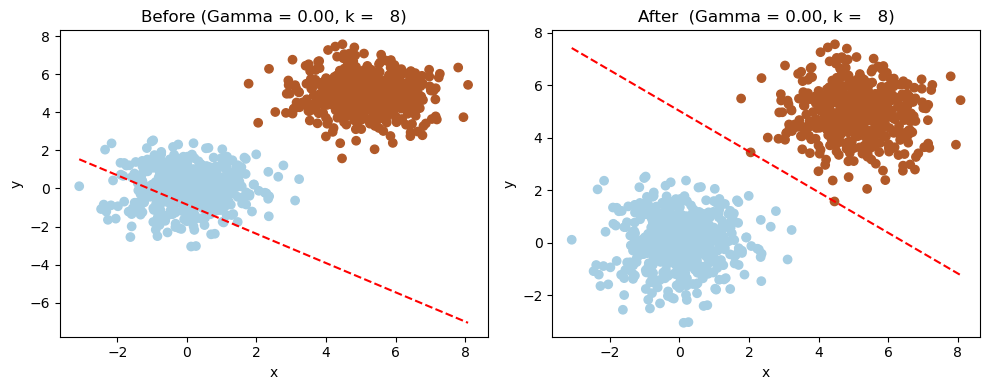


Results for gamma = 0.5:

Run 1: Weights = [ 1.48038,  0.99079, -8.39724], k = 13

Run 2: Weights = [ 3.36234,  2.21130, -9.99989], k = 16

Run 3: Weights = [ 4.56585,  2.08212, -13.45034], k = 22

Run 4: Weights = [ 2.82667,  2.08688, -14.70910], k = 23

Run 5: Weights = [ 3.21437,  1.59549, -13.02732], k = 20

Average k for gamma = 0.5: 18.80


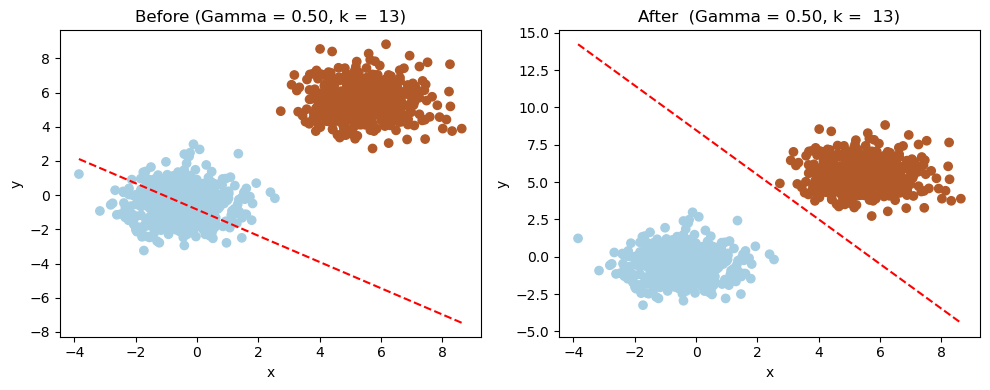


Results for gamma = 1.0:

Run 1: Weights = [ 0.97179,  0.77816, -3.39724], k = 4

Run 2: Weights = [ 2.55381,  2.04498, -7.99989], k = 10

Run 3: Weights = [ 1.80876,  0.87853, -7.45034], k = 10

Run 4: Weights = [ 3.29504,  1.14950, -7.70910], k = 10

Run 5: Weights = [ 1.39001,  0.61020, -3.02732], k = 4

Average k for gamma = 1.0: 7.60


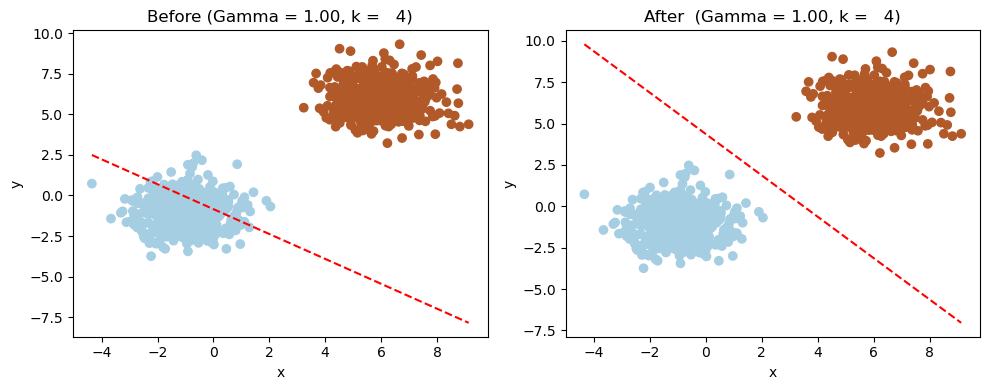


Results for gamma = 1.5:

Run 1: Weights = [ 0.75193,  1.46267, -3.39724], k = 4

Run 2: Weights = [ 1.00838,  0.90001, -1.99989], k = 2

Run 3: Weights = [ 5.36441,  2.22963, -7.45034], k = 10

Run 4: Weights = [ 0.75391,  1.45563, -3.70910], k = 4

Run 5: Weights = [ 0.52602,  1.48829, -3.02732], k = 4

Average k for gamma = 1.5: 4.80


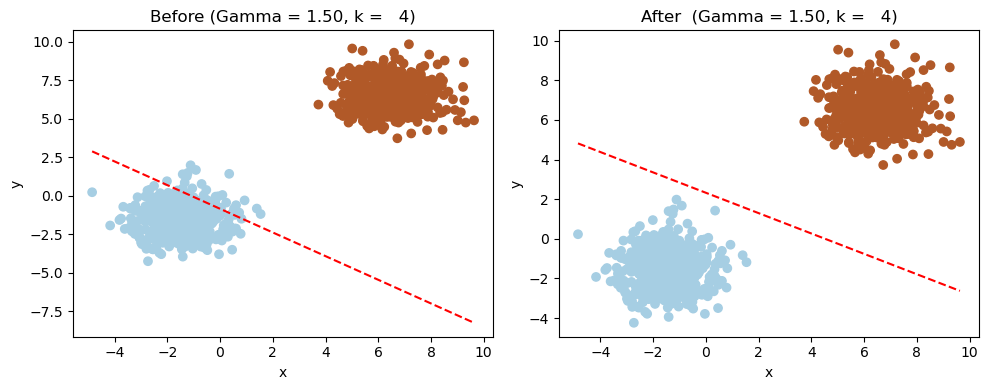


Results for gamma = 2:

Run 1: Weights = [ 2.16668,  1.60051, -1.39724], k = 2

Run 2: Weights = [ 1.72110,  2.17503, -1.99989], k = 2

Run 3: Weights = [ 1.78466,  1.47655, -1.45034], k = 2

Run 4: Weights = [ 2.14216,  1.88783, -1.70910], k = 2

Run 5: Weights = [ 2.59060,  0.86432, -2.02732], k = 3

Average k for gamma = 2: 2.20


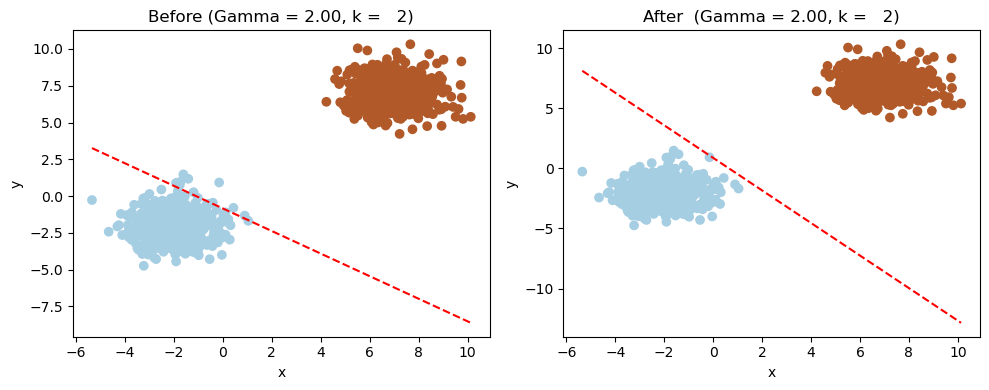


Average k values for different gamma:
+-------+-----------+
| Gamma | Average_k |
+-------+-----------+
|  0.0  |   17.2    |
|  0.5  |   18.8    |
|  1.0  |    7.6    |
|  1.5  |    4.8    |
|  2.0  |    2.2    |
+-------+-----------+


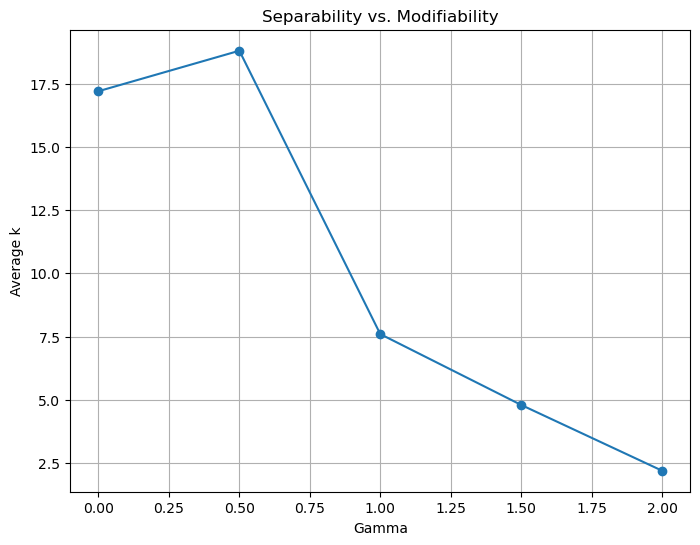

In [13]:
gamma_values = [0.0,0.5, 1.0, 1.5,2]
average_k_values = []

for gamma in gamma_values:
    X, y = generate_linear_data(1000, gamma)
    results = perceptron_learning_algorithm(X, y)

    print(f"\nResults for gamma = {gamma}:")
    avg_k = 0

    for run, (initial_weight,weights, k) in enumerate(results):
        print(f"\nRun {run + 1}: Weights = [{weights[0]:8.5f}, {weights[1]:8.5f}, {weights[2]:8.5f}], k = {k}")
        avg_k += k

    avg_k /= len(results)
    average_k_values.append(avg_k)
    print(f"\nAverage k for gamma = {gamma}: {avg_k:.2f}")

    # Plot classifier for one run corresponding to the gamma
    plot_subplots(X, y, results[:1], [gamma])
    
# # Create a table with gamma and average k values
# data = {'Gamma': gamma_values, 'Average_k': average_k_values}
# df = pd.DataFrame(data)
# print("\nAverage k values for different gamma:")
# print(df)

# Create a table with gamma and average k values
data = {'Gamma': gamma_values, 'Average_k': average_k_values}
df = pd.DataFrame(data)

# Use tabulate to print the table with borders
table_str = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

print("\nAverage k values for different gamma:")
print(table_str)

# Plot the relationship between gamma and average k
plt.figure(figsize=(8, 6))
plt.plot(gamma_values, average_k_values, marker='o')
plt.title('Separability vs. Modifiability')
plt.xlabel('Gamma')
plt.ylabel('Average k')
plt.grid()
plt.show()

### Obeservation

- From the above plot it can be gussed that as the level of seperability increases, the number of updates or misclassification decreases

In [14]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## 2) Gradient descent for training a linear classifier



### Loss Formulation 

- considering the binary cross entropy as the loss function

In [27]:
EPSILON = 1e-15 # Tolerance parameter for handling log(0) cases

def cross_entropy_loss(X, y, weights, bias):
    
    # Cross-entropy loss 
    scores = np.dot(X[:, :-1], weights) + bias
    probabilities = sigmoid(scores)
    probabilities = np.clip(probabilities, EPSILON, 1 - EPSILON)
    loss = -np.mean(((1+y)/2) * np.log((1+probabilities)/2) + ((1 - y)/2) * np.log((1 - probabilities)/2))
    return loss

### Gradient Computation & Update Equation

In [36]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_gradient(X, y, weights, bias):
    # Compute the gradient of the cross-entropy loss
    scores = np.dot(X[:, :-1], weights) + bias  
    probabilities = sigmoid(scores)
#     print(probabilities)
#     gradient_weights = np.dot(X[:, :-1].T, ((probabilities*(probabilities - y))/(1-probabilities))) 
#     gradient_bias = np.sum(((probabilities*(probabilities - y))/(1-probabilities)))
    
    gradient_weights = np.dot(X[:, :-1].T, probabilities - y) 
    gradient_bias = np.sum(probabilities - y)
    return gradient_weights / len(y), gradient_bias / len(y)

def gradient_descent(X, y, learning_rate=0.5, num_epochs=1000):
    num_points, num_features = X.shape
    weights = np.array([-2.0,1.0])  
    bias = 0

    for epoch in range(num_epochs):
        loss = cross_entropy_loss(X, y, weights, bias)
        gradient_weights, gradient_bias = compute_gradient(X, y, weights, bias)

        # Updating the weights and bias using gradient descent
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch:3}, Loss: {loss:.5f}")

    return weights, bias


### Plotting Classifier 

Epoch   0, Loss: 1.60229
Epoch 100, Loss: 0.34657
Epoch 200, Loss: 0.34657
Epoch 300, Loss: 0.34657
Epoch 400, Loss: 0.34657
Epoch 500, Loss: 0.34657
Epoch 600, Loss: 0.34657
Epoch 700, Loss: 0.34657
Epoch 800, Loss: 0.34657
Epoch 900, Loss: 0.34657


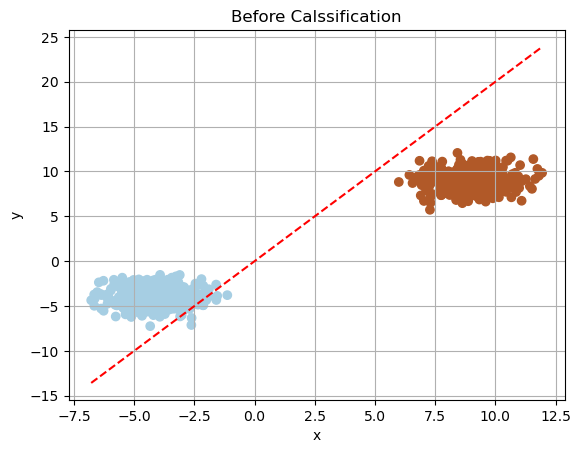

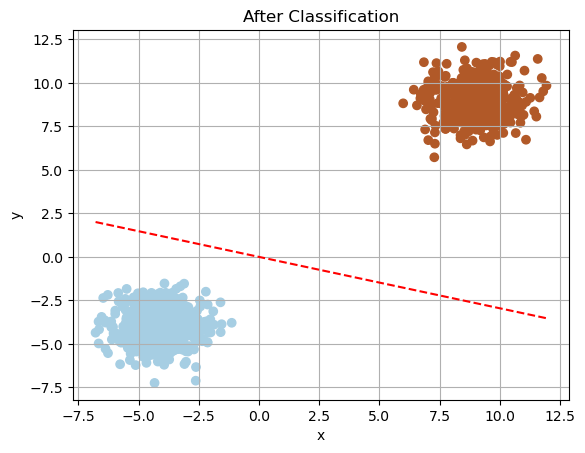

In [37]:
def plot_classifier(X, y, weights, bias, title):
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

    # Plotting the decision boundary
    x_decision_boundary = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
    y_decision_boundary = -(bias / weights[1]) - (weights[0] / weights[1]) * x_decision_boundary
    plt.plot(x_decision_boundary, y_decision_boundary, color='red', linestyle='--')
    plt.grid()
    plt.show()


X,y = generate_linear_data(1000,4)
y[1::2,:] = 0.0
y = y.ravel()


# Performing the gradient descent 
learned_weights, learned_bias = gradient_descent(X, y)
weights_true = [-2,1]

# Plot dataset before and after training
plot_classifier(X, y, weights_true, 0, "Before Calssification")
plot_classifier(X, y, learned_weights, learned_bias, "After Classification")

# 3. MLP with a single hidden layer 

### Dataset Creation

- The data is created using the equation of circle with sine and cosine as the axis, a normal guassian errorous noise is added to increase it concentric spread

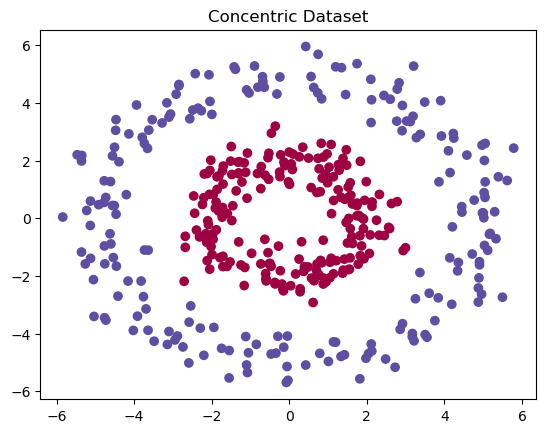

In [149]:
def create_concentric_dataset_numpy(num_samples, inner_radius=2, outer_radius=5, noise_scale=0.3):
    np.random.seed(42)
    theta = np.linspace(0, 2 * np.pi, num_samples)

    # Inner circle
    inner_circle_x = inner_radius * np.cos(theta)
    inner_circle_y = inner_radius * np.sin(theta)
    inner_labels = np.zeros(num_samples)

    # Outer circle
    outer_circle_x = outer_radius * np.cos(theta)
    outer_circle_y = outer_radius * np.sin(theta)
    outer_labels = np.ones(num_samples)

    # Combine the circles
    data_x = np.concatenate([inner_circle_x, outer_circle_x])
    data_y = np.concatenate([inner_circle_y, outer_circle_y])
    labels = np.concatenate([inner_labels, outer_labels])

    # Add more noise to the dataset
    noise = np.random.normal(0, noise_scale, size=(2 * num_samples, 2))
    data_x += noise[:, 0]
    data_y += noise[:, 1]

    # Shuffle the dataset
    indices = np.random.permutation(2 * num_samples)

    return data_x[indices], data_y[indices], labels[indices]

# Visualize the dataset
data_x, data_y, labels = create_concentric_dataset_numpy(200, noise_scale=0.5)
plt.scatter(data_x, data_y, c=labels, cmap=plt.cm.Spectral)
plt.title('Concentric Dataset')
plt.show()


###  MLP and Backpropogation

In [154]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Binary cross-entropy loss function
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # Small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return - (y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()

# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_hidden = np.random.randn(input_size, hidden_size)
    biases_hidden = np.zeros((1, hidden_size))
    weights_output = np.random.randn(hidden_size, output_size)
    biases_output = np.zeros((1, output_size))
#     print(weights_hidden, biases_hidden, weights_output, biases_output)
    return weights_hidden, biases_hidden, weights_output, biases_output

# Forward pass
def forward_pass(X, weights_hidden, biases_hidden, weights_output, biases_output):
    hidden_input = np.dot(X, weights_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)
    output_layer_input = np.dot(hidden_output, weights_output) + biases_output
    output = sigmoid(output_layer_input)
    return hidden_input,hidden_output, output

# Backward pass
def backward_pass(X, y, hidden_output, output, weights_output,hidden_input):
    
    output_error = output - y
    output_delta = output_error 
    
    hidden_error = output_delta.dot(weights_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_input)

    return hidden_delta, output_delta

# Update weights and biases
def update_parameters(X, hidden_output, hidden_delta, output_delta, weights_hidden,
                      biases_hidden, weights_output, biases_output, learning_rate):
    weights_output -= hidden_output.T.dot(output_delta) * learning_rate
    biases_output -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate

    weights_hidden -= X.T.dot(hidden_delta) * learning_rate
    biases_hidden -= np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    return weights_hidden, biases_hidden, weights_output, biases_output

# Train the MLP
def train_mlp(X, y, hidden_size, epochs, learning_rate):
    input_size = X.shape[1]
    output_size = 1  
    weights_hidden, biases_hidden, weights_output, biases_output = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        # Forward pass
        hidden_input,hidden_output, output = forward_pass(X, weights_hidden, biases_hidden, weights_output, biases_output)

        # Backward pass
        hidden_delta, output_delta = backward_pass(X, y, hidden_output, output, weights_output,hidden_input)

        # Update parameters
        weights_hidden, biases_hidden, weights_output, biases_output = update_parameters(
            X, hidden_output, hidden_delta, output_delta, weights_hidden, biases_hidden, weights_output, biases_output, learning_rate
        )

        # Compute and print the loss
        loss = binary_cross_entropy_loss(y, output)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch:5d}, Loss: {loss:.5f}")

    return weights_hidden, biases_hidden, weights_output, biases_output


# Convert labels to column vector
labels = labels.reshape(-1, 1)

# Combine features into a matrix
X = np.column_stack((data_x, data_y))
# Define hyperparameters
hidden_size = 4
epochs = 10000
learning_rate = 0.01

# Train the MLP
weights_hidden, biases_hidden, weights_output, biases_output = train_mlp(X, labels, hidden_size, epochs, learning_rate)

Epoch     0, Loss: 0.74209
Epoch  1000, Loss: 0.01925
Epoch  2000, Loss: 0.01166
Epoch  3000, Loss: 0.00862
Epoch  4000, Loss: 0.00690
Epoch  5000, Loss: 0.00583
Epoch  6000, Loss: 0.00508
Epoch  7000, Loss: 0.00452
Epoch  8000, Loss: 0.00409
Epoch  9000, Loss: 0.00374


### Plotting Contour 

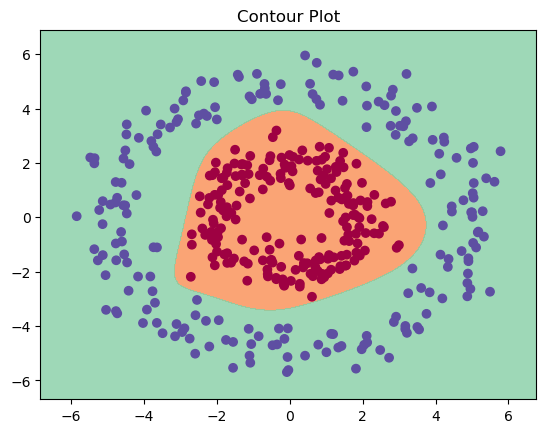

In [155]:
def plot_contour(X, y, weights_hidden, biases_hidden, weights_output, biases_output):
    # Generate a meshgrid for the entire range of data
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    # Flatten and combine the meshgrid points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

 
    *_, predictions = forward_pass(mesh_points, weights_hidden, biases_hidden, weights_output, biases_output)

    # Reshape predictions to the shape of the meshgrid
    predictions = predictions.reshape(xx.shape)

    # Plot the contour plot
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)
    plt.title('Contour Plot')
    plt.show()
    
# Plot the decision boundary and contour plot
plot_contour(X, labels, weights_hidden, biases_hidden, weights_output, biases_output)

### Measuring the accurcay 

In [123]:
# Forward pass to get predictions
def predict(X, weights_hidden, biases_hidden, weights_output, biases_output):
    hidden_input = np.dot(X, weights_hidden) + biases_hidden
    hidden_output = sigmoid(hidden_input)
    output_layer_input = np.dot(hidden_output, weights_output) + biases_output
    output = sigmoid(output_layer_input)
    return output

# Calculating accuracy
def calculate_accuracy(predictions, labels, threshold=0.5):
    
    # Threshold the predictions
    binary_predictions = (predictions >= threshold).astype(int)
    
    # Compare predictions to actual labels
    correct_predictions = np.sum(binary_predictions == labels)

    # Calculate accuracy
    accuracy = correct_predictions / len(labels)
    return accuracy

predictions = predict(X, weights_hidden, biases_hidden, weights_output, biases_output)

accuracy = calculate_accuracy(predictions, labels, threshold=0.5)

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%
